# MNIST Double Layer CNN Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[CNN-01]
Import modules and set a random seed.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import models
from keras import initializers
from keras.datasets import mnist

np.random.seed(20190220)

Using TensorFlow backend.


####[CNN-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

####[CNN-03]
Define a CNN model with a single convolutional filter layer.

In [3]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(64, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)    

####[CNN-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CNN-05]
Train the model. It achieves the 99.2% accuracy.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1528 - acc: 0.9521 - val_loss: 0.0486 - val_acc: 0.9842
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0439 - acc: 0.9866 - val_loss: 0.0282 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0303 - acc: 0.9902 - val_loss: 0.0267 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0267 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0233 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0133 - acc: 0.9961 - val_loss: 0.0275 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 9s 143us/step -

####[CNN-06]
Plot chars for accuracy and loss values.

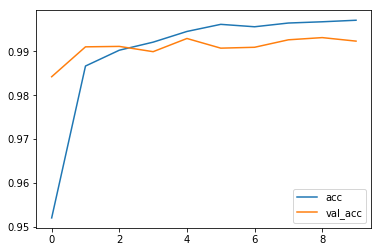

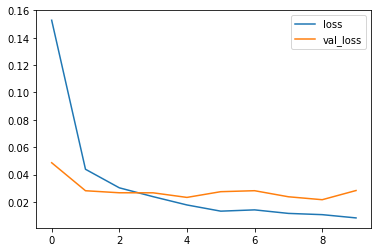

In [6]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[CNN-07]
Mount your Google Drive on `/content/gdrive`.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDF-08]
Export the trained model as a file `MNIST_double.hd5` on your Google Drive.

In [8]:
model.save('/content/gdrive/My Drive/MNIST_double.hd5')
!ls -lh '/content/gdrive/My Drive/MNIST_double.hd5'

-rw------- 1 root root 38M Feb 25 10:17 '/content/gdrive/My Drive/MNIST_double.hd5'
